# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
#From Kaggle
#1. PregnanciesNumber of times pregnant
#2. GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. BloodPressureDiastolic blood pressure (mm Hg)
#4. SkinThicknessTriceps skin fold thickness (mm)
#5. Insulin2-Hour serum insulin (mu U/ml)
#6. BMIBody mass index (weight in kg/(height in m)^2)
#7. DiabetesPedigreeFunctionDiabetes pedigree function
#8. AgeAge (years)
#9. OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0

#colnames = ['NoPregnancies', 'GlucosePlasma', 'BPDiabolic', 'SkinThickTricep', 'InsulinSerum', 'BMI', 'Pedigree', 'Age', 'ClassDiabetic']
#pima = pd.read_csv("pima-indians-diabetes.data", names= colnames)

#using the new CSV file given
filename = "pima-indians-diabetes.csv"
pima = pd.read_csv(filename)

#Find the missing value. 
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", pima.isna().sum())
print("Null values\n", pima.isnull().sum())

#Look at the unique values of class values.
#the unique values of class values
print("\nUnique values of attribute - class", pima["class"].unique())

#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for pimaClass in pima.items():
    print(pimaClass[0], pimaClass[1].nunique())
    
#Check if there are any patients is age < 21
print("\nCheck the number of patients less than 21 years of age", pima[pima["age"]<21]["class"].count())

NA values
 Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
Null values
 Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Unique values of attribute - class [1 0]

Number of unique values of other attributes
Preg 17
Plas 136
Pres 47
skin 51
test 186
mass 248
pedi 517
age 52
class 2

Check the number of patients less than 21 years of age 0


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
#check 10 samples
pima.sample(10)

Preg  Plas  Pres  skin  test  mass   pedi  age  class
449     0   120    74    18    63  30.5  0.285   26      0
126     3   120    70    30   135  42.9  0.452   30      0
730     3   130    78    23    79  28.4  0.323   34      1
280     0   146    70     0     0  37.9  0.334   28      1
609     1   111    62    13   182  24.0  0.138   23      0
640     0   102    86    17   105  29.3  0.695   27      0
62      5    44    62     0     0  25.0  0.587   36      0
691    13   158   114     0     0  42.3  0.257   44      1
620     2   112    86    42   160  38.4  0.246   28      0
210     2    81    60    22     0  27.7  0.290   25      0

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
#Get the datatype information about the dataset
print(pima.dtypes)

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima.describe().transpose()

count        mean         std     min       25%       50%        75%  \
Preg   768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   
Plas   768.0  120.894531   31.972618   0.000  99.00000  117.0000  140.25000   
Pres   768.0   69.105469   19.355807   0.000  62.00000   72.0000   80.00000   
skin   768.0   20.536458   15.952218   0.000   0.00000   23.0000   32.00000   
test   768.0   79.799479  115.244002   0.000   0.00000   30.5000  127.25000   
mass   768.0   31.992578    7.884160   0.000  27.30000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
Preg    17.00  
Plas   199.00  
Pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the invalid 0s in the column ( based on your understanding of the data) with the median of the same column value accordingly.

In [7]:
#Non zero columns
#2. GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. BloodPressureDiastolic blood pressure (mm Hg)
#4. SkinThicknessTriceps skin fold thickness (mm)
#5. Insulin2-Hour serum insulin (mu U/ml)
#6. BMIBody mass index (weight in kg/(height in m)^2)
#7. DiabetesPedigreeFunctionDiabetes pedigree function
#8. AgeAge (years)
colNamesForZero = ["Plas", "Pres", "skin", "test", "mass", "pedi", "age"]
print("Belore - columns with 0")
print((pima[colNamesForZero].describe().transpose())["min"]==0)
#replace 0 values for each column appropriately
pima[colNamesForZero] = pima[colNamesForZero].replace(0, pima[colNamesForZero].median())
#check if the 0 values are gone
pima.describe().transpose()

Belore - columns with 0
Plas     True
Pres     True
skin     True
test     True
mass     True
pedi    False
age     False
Name: min, dtype: bool


count        mean         std     min       25%       50%        75%  \
Preg   768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   
Plas   768.0  121.656250   30.438286  44.000  99.75000  117.0000  140.25000   
Pres   768.0   72.386719   12.096642  24.000  64.00000   72.0000   80.00000   
skin   768.0   27.334635    9.229014   7.000  23.00000   23.0000   32.00000   
test   768.0   94.652344  105.547598  14.000  30.50000   31.2500  127.25000   
mass   768.0   32.450911    6.875366  18.200  27.50000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
Preg    17.00  
Plas   199.00  
Pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

# Q5 Print the descriptive statistics of each & every column using describe() function

In [8]:
pima.describe()

Preg        Plas        Pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.656250   72.386719   27.334635   94.652344   32.450911   
std      3.369578   30.438286   12.096642    9.229014  105.547598    6.875366   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   23.000000   30.500000   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   31.250000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

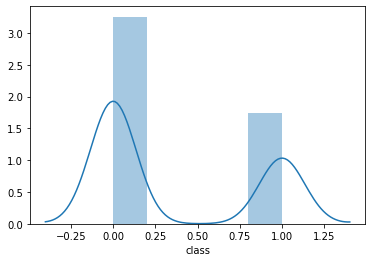

In [9]:
#Along side distribution pairplot to see how the distribution
sns.distplot(pima["class"])
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Plot for  Preg


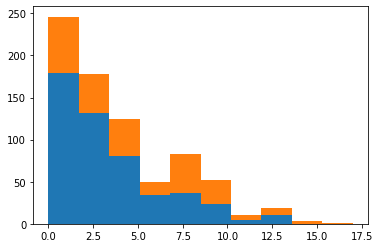

Plot for  Plas


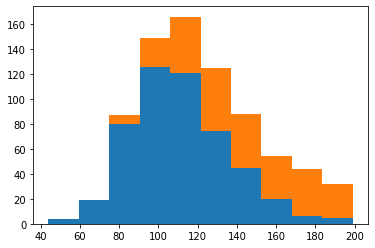

Plot for  Pres


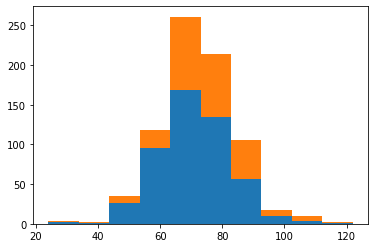

Plot for  skin


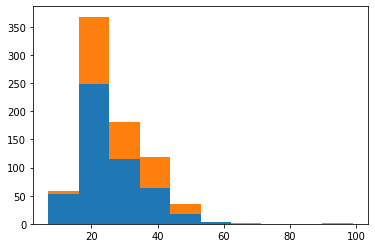

Plot for  test


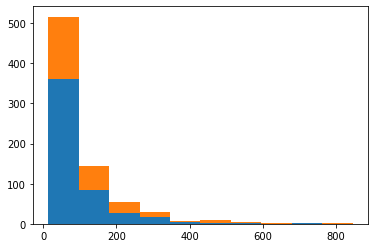

Plot for  mass


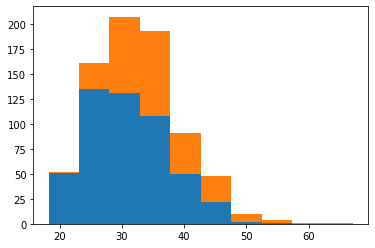

Plot for  pedi


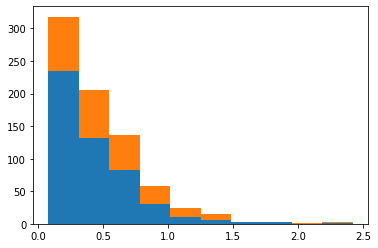

Plot for  age


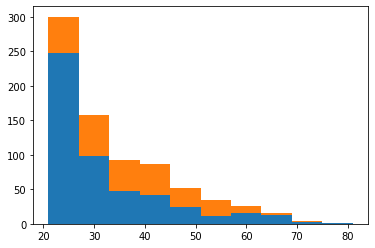

In [10]:
columns = ["Preg", "Plas", "Pres", "skin", "test", "mass", "pedi", "age"]
for col in columns:
    print("Plot for ", col)
    histData = [pima[col][pima["class"]==cls_name] for cls_name in [0, 1]]
    plt.hist(histData, histtype='bar', stacked=True)
    plt.show()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

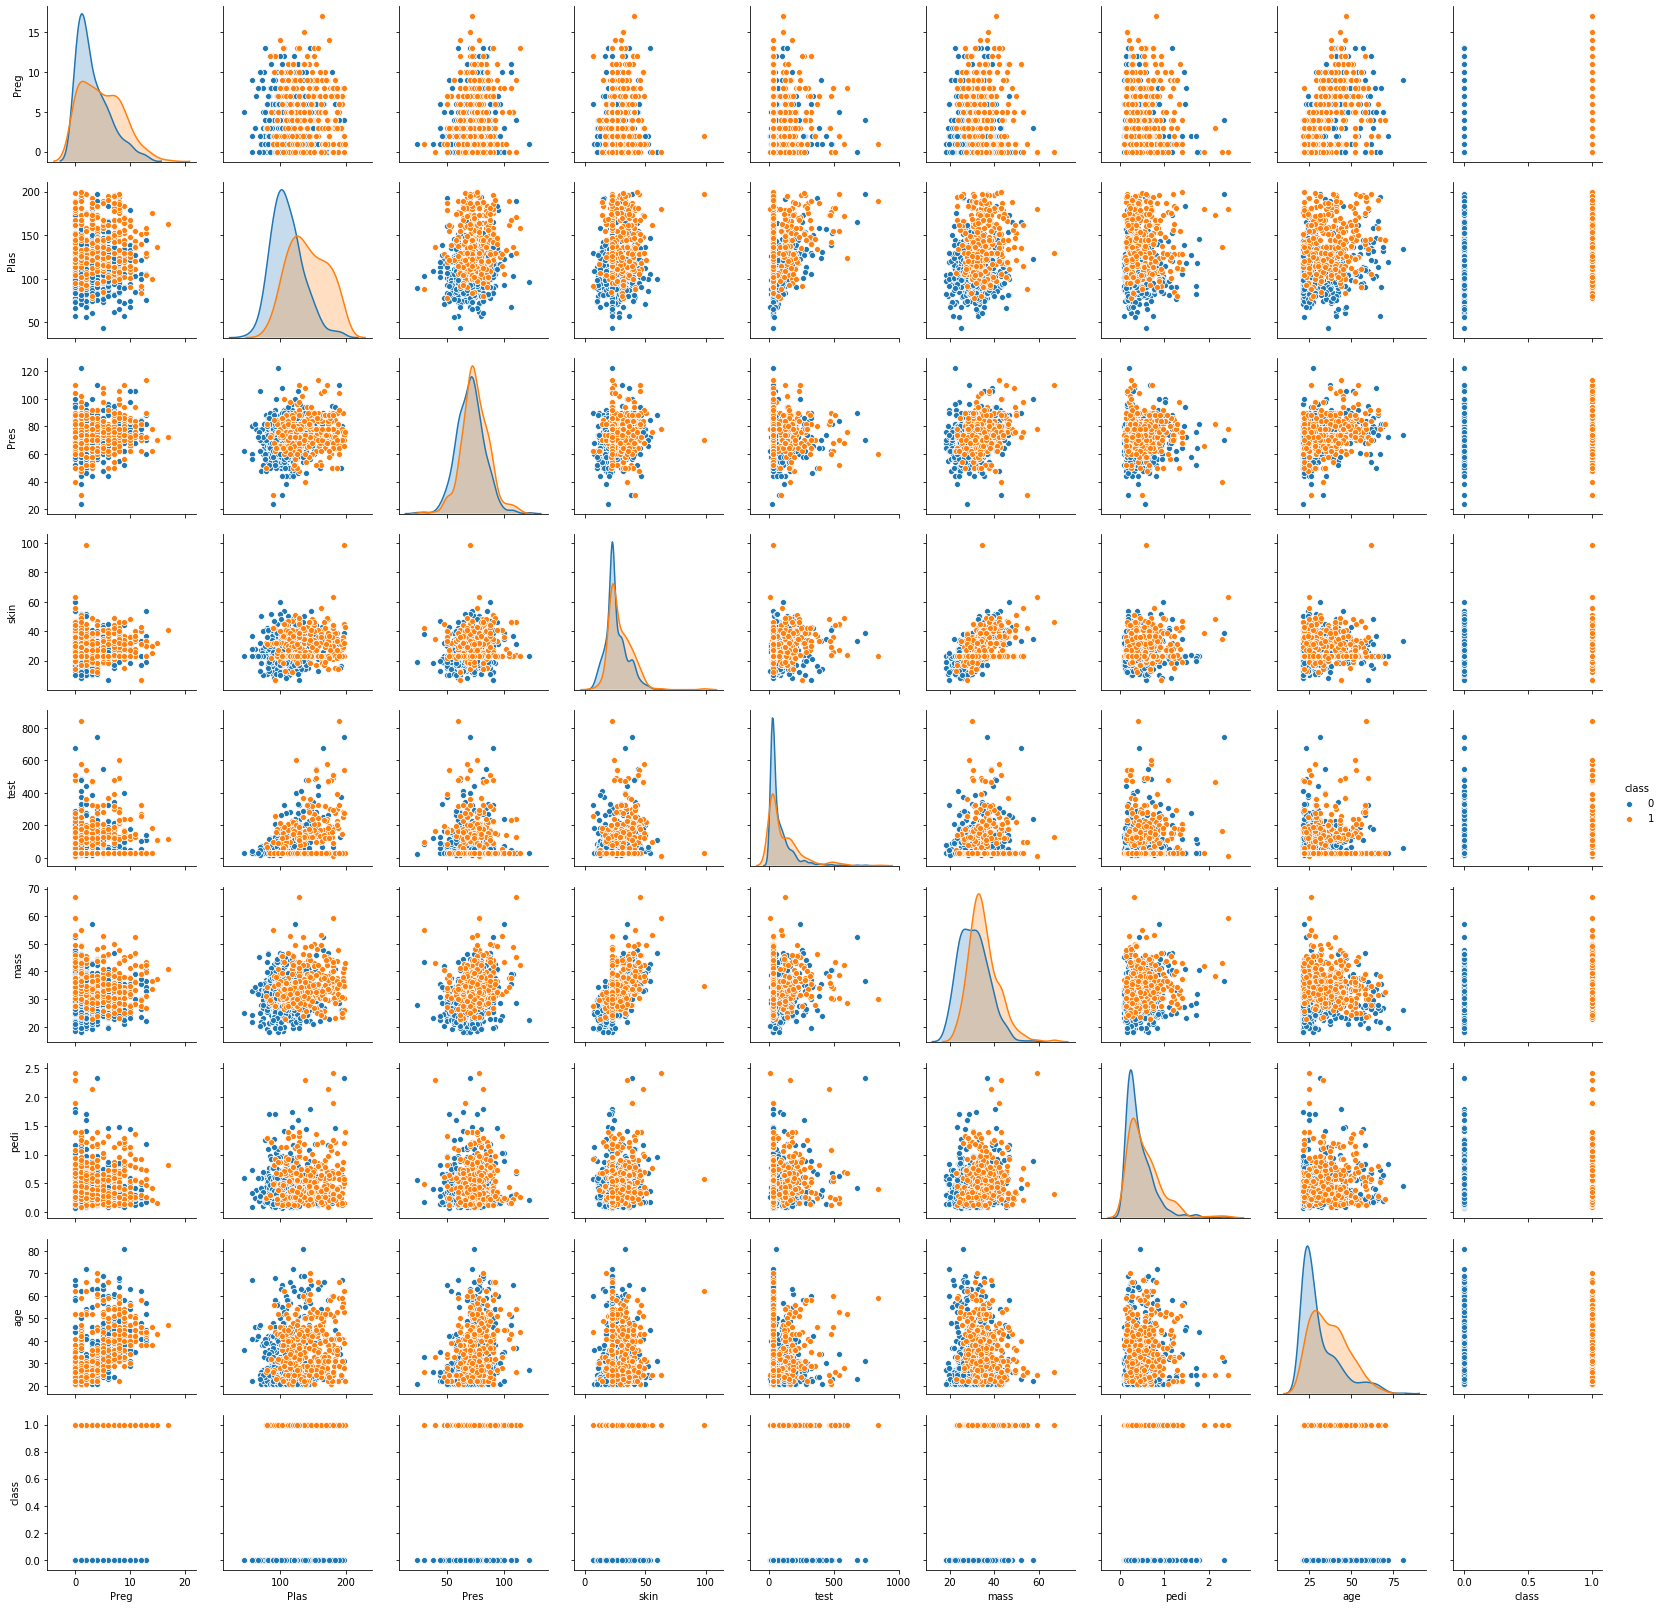

In [11]:
sns.pairplot(pima, diag_kind="kde", hue="class")
plt.show()

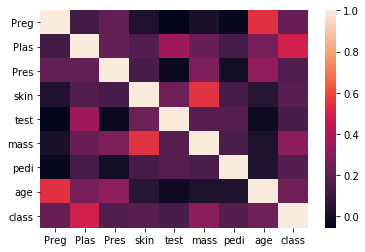

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.128213  0.208615  0.032568 -0.055697  0.021546 -0.033523   
Plas   0.128213  1.000000  0.218937  0.172143  0.357573  0.231400  0.137327   
Pres   0.208615  0.218937  1.000000  0.147809 -0.028721  0.281132 -0.002378   
skin   0.032568  0.172143  0.147809  1.000000  0.238188  0.546951  0.142977   
test  -0.055697  0.357573 -0.028721  0.238188  1.000000  0.189022  0.178029   
mass   0.021546  0.231400  0.281132  0.546951  0.189022  1.000000  0.153506   
pedi  -0.033523  0.137327 -0.002378  0.142977  0.178029  0.153506  1.000000   
age    0.544341  0.266909  0.324915  0.054514 -0.015413  0.025744  0.033561   
class  0.221898  0.492782  0.165723  0.189065  0.148457  0.312249  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.266909  0.492782  
Pres   0.324915  0.165723  
skin   0.054514  0.189065  
test  -0.015413  0.148457  
mass   0.025744  0.312249  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [12]:
sns.heatmap(pima.corr())
plt.show()
pima.corr()

In [13]:
print("It seems that Plasma, Mass, Age [both from graph and corr] are seen as features influencing. Test, Pressure and Skin seem to have low corr seems ")

It seems that Plasma, Mass, Age [both from graph and corr] are seen as features influencing. Test, Pressure and Skin seem to have low corr seems 


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [14]:
#Preparing Y - Feature to be learnt and then identified
Y = pima['class']
#Preparing X - All required columns except the identified Y & ID which has no significance
X = pima.drop(['class'],axis=1)

In [15]:
#Get the X & Y split into 80% training data nad 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [16]:
dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0)

#just as good practice use Standard Scaler to scale the data
sc = StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
dtc.fit(scaledX_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [17]:
print("Testing Accuracy")
print(dtc.score(scaledX_test, Y_test))
print("Training Accuracy")
print(dtc.score(scaledX_train, Y_train))
predicted = dtc.predict(scaledX_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test, predicted))

Testing Accuracy
0.7619047619047619
Training Accuracy
0.8081936685288641
Confusion Matrix
[[134  23]
 [ 32  42]]


Print the feature importance of the decision model - Optional

In [18]:
featureImportance = dtc.feature_importances_
i = 0
for col in pima.drop(['class'],axis=1).columns:
    print(col, " - ", featureImportance[i]) 
    i = i + 1

Preg  -  0.045633222797624884
Plas  -  0.481503389575332
Pres  -  0.020840202721213823
skin  -  0.035395610262286034
test  -  0.0
mass  -  0.15413456175592746
pedi  -  0.10997578898651958
age  -  0.15251722390109632
